# Proyek Menyelesaikan Permasalahan HR

*   Nama : Maria Goretti Risadniati Madsun
*   email : risadniati@gmail.com
*   ID Dicoding : icachan47




## Business Understanding

Pada proyek ini, akan diangkat sebuah studi kasus mengenai perusahaan Jaya Jaya Maju. Perusahaan tersebut telah berdiri sejak tahun 2000 dengan karyawan lebih dari 1000 orang.

Walau demikian, Jaya Jaya Maju masih cukup kesulitan mengelola karyawan, sehingga attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) lebih dari 10%.

Oleh karena itu, perlu diidentifikasi berbagai faktor yang mempengaruhi hal tersebut, yang selanjutnya akan ditampilkan dalam business dashboard.

## Cakupan Proyek

Pada proyek ini, akan dibuat business dashboard yang berisi faktor-faktor yang berpengaruh terhadap attrition rate. Berikut beberapa pertanyaan untuk menjawab hal tersebut :
- Berapakah tingkat persentase attrition rate pada perusahaan?
- Bagaimana penilaian karyawan terhadap relasi kerja ?
- Bagaimana penilaian karyawan mengenai keseimbangan kehidupan dan pekerjaan ?
- Bagaimana hubungan pendapatan bulanan terhadap attrition rate?
- Bagaimana attrition rate pada berbagai divisi yang ada di perusahaan ?


## Persiapan

Menyiapkan direktori dan virtual environment

In [1]:
# Membuat direktori proyek
!mkdir proyek_hr

In [2]:
# Memindahkan ke direktori proyek
%cd proyek_hr

/content/proyek_hr


In [3]:
# Menginstal 'virtualenv'
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 21.6 MB/s eta 0:00:00


In [4]:
# Membuat virtual environment di dalam direktori proyek
!virtualenv env

created virtual environment CPython3.10.12.final.0-64 in 1169ms
  creator CPython3Posix(dest=/content/proyek_hr/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [5]:
# Mengaktifkan virtual environment dan menginstal paket yang diperlukan
!source env/bin/activate && pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 760.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.5 MB/s eta 0:00:00


Menyiapkan library yang dibutuhkan

In [6]:
# Menginstall library
!pip install numpy pandas scipy matplotlib seaborn jupyter sqlalchemy scikit-learn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [8]:
# Menggunakan paket dari virtual environment
sys.path.append('/content/proyek_hr/env/lib/python3.8/site-packages')

In [9]:
# Verifikasi instalasi
print(np.__version__)

1.25.2


## Data Preparation

Menyiapkan data yang digunakan

In [10]:
main_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
     encoding='windows-1252'
)
main_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


The data contains demographic details, work-related metrics and attrition flag.

    EmployeeId - Employee Identifier
    Attrition - Did the employee attrition? (0=no, 1=yes)
    Age - Age of the employee
    BusinessTravel - Travel commitments for the job
    DailyRate - Daily salary
    Department - Employee Department
    DistanceFromHome - Distance from work to home (in km)
    Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
    EducationField - Field of Education
    EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
    Gender - Employee's gender
    HourlyRate - Hourly salary
    JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
    JobLevel - Level of job (1 to 5)
    JobRole - Job Roles
    JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
    MaritalStatus - Marital Status
    MonthlyIncome - Monthly salary
    MonthlyRate - Mounthly rate
    NumCompaniesWorked - Number of companies worked at
    Over18 - Over 18 years of age?
    OverTime - Overtime?
    PercentSalaryHike - The percentage increase in salary last year
    PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
    RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
    StandardHours - Standard Hours
    StockOptionLevel - Stock Option Level
    TotalWorkingYears - Total years worked
    TrainingTimesLastYear - Number of training attended last year
    WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
    YearsAtCompany - Years at Company
    YearsInCurrentRole - Years in the current role
    YearsSinceLastPromotion - Years since the last promotion
    YearsWithCurrManager - Years with the current manager


### Data Cleansing

- Memeriksa apakah terdapat missing value

In [11]:
main_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat 412 kolom yang berisi NaN pada 'attrition', nilai ini akan disubstitusi dengan nilai modus

In [12]:
# Menghitung modus dari kolom 'Attrition'
mode_value = main_df['Attrition'].mode()[0]

# Menampilkan hasil modus
print("Modus dari kolom 'Attrition':", mode_value)

Modus dari kolom 'Attrition': 0.0


In [13]:
# Mengisi nilai kosong di kolom 'Attrition' dengan modus
main_df['Attrition'].fillna(mode_value, inplace=True)

# Memastikan tidak ada nilai kosong di kolom 'Attrition'
print("Jumlah nilai kosong di kolom 'Attrition' setelah imputation:", main_df['Attrition'].isnull().sum())

# Melihat 5 baris pertama dari dataset setelah pengisian
main_df.head(5)

Jumlah nilai kosong di kolom 'Attrition' setelah imputation: 0


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [14]:
main_df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Memeriksa apakah ada invalid value

In [15]:
print(main_df.dtypes)

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

Tipe data pada kolom attrition bisa diubah menjadi integer, karena float dianggap kurang tepat

In [16]:
# Mengubah tipe data kolom 'Attrition' menjadi integer
main_df['Attrition'] = main_df['Attrition'].astype(int)

# Memeriksa tipe data setelah perubahan
print(main_df.dtypes)

EmployeeId                   int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- Memeriksa apakah ada data yang duplikat

In [17]:
# Memeriksa baris duplikat
duplicate_rows = main_df[main_df.duplicated()]

# Menampilkan baris duplikat
print("Baris duplikat:")
print(duplicate_rows)


Baris duplikat:
Empty DataFrame
Columns: [EmployeeId, Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


Tidak ada baris yang duplikat dalam database, maka database cukup baik dan unik

- Memeriksa apakah ada inaccurate value

In [18]:
# Melihat ringkasan statistik dari seluruh dataset
main_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.121769,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.327130,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Statistik data terlihat normal. Data dapat digunakan untuk diproses

In [28]:
# Menyimpan dataframe ke file CSV
main_df.to_csv('modified_employee_data.csv', index=False)

from google.colab import files
files.download('modified_employee_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Distribusi employee attrition

In [20]:
# Menghitung jumlah karyawan aktif dan yang keluar
jumlah_aktif = main_df[main_df['Attrition'] == 0].shape[0]
jumlah_keluar = main_df[main_df['Attrition'] == 1].shape[0]

print(f"Jumlah Karyawan Aktif (Attrition = 0): {jumlah_aktif}")
print(f"Jumlah Karyawan yang Keluar (Attrition = 1): {jumlah_keluar}")


Jumlah Karyawan Aktif (Attrition = 0): 1291
Jumlah Karyawan yang Keluar (Attrition = 1): 179


In [21]:
# Menghitung jumlah karyawan yang mengalami attrition (assume 'Yes' means attrition occurred)
attrition_count = main_df[main_df['Attrition'] == 1].shape[0]

# Menghitung total jumlah karyawan
total_employees = main_df.shape[0]

# Menghitung persentase attrition
attrition_rate = (attrition_count / total_employees) * 100

print(f"Tingkat Attrition: {attrition_rate:.2f}%")

Tingkat Attrition: 12.18%


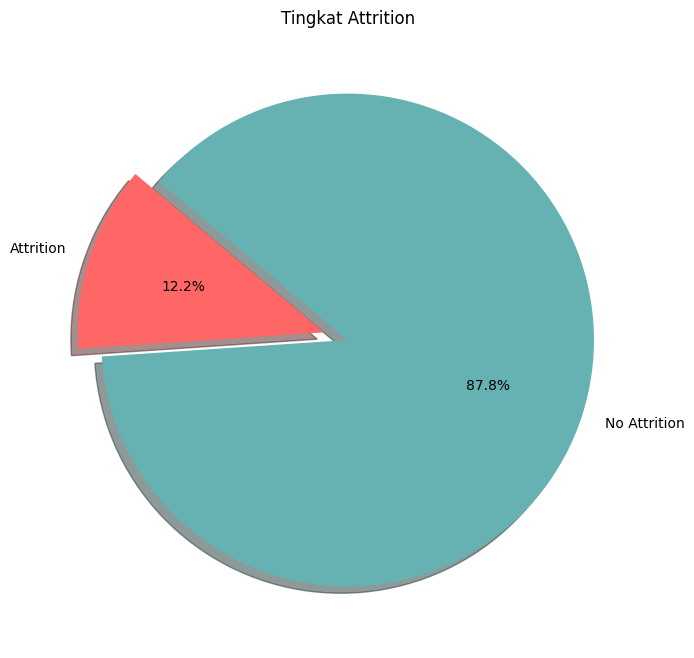

In [22]:
# Data untuk grafik
labels = ['Attrition', 'No Attrition']
sizes = [attrition_count, total_employees - attrition_count]
colors = ['#ff6666', '#66b2b2']
explode = (0.1, 0)  # explode 1st slice

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Tingkat Attrition')
plt.show()


Melalui pie chart ini, dapat dilihat bahwa dari 1470 karyawan, terdapat 12.2% yang memutuskan untuk berhenti dari pekerjaan mereka, sedangkan 87.8% lainnya tetap bekerja untuk perusahaan.

### Penilaian Kepuasan Relasi oleh Karyawan

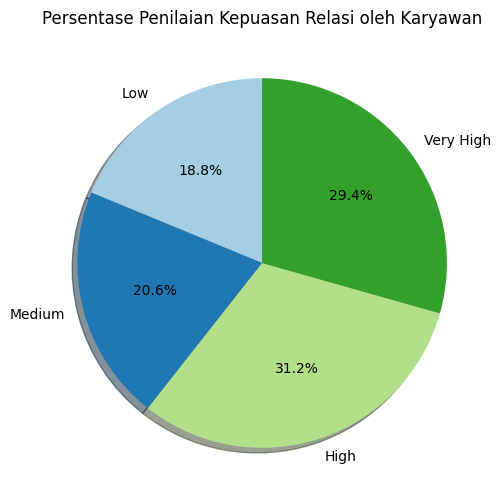

In [23]:
# Menghitung nilai di kolom 'RelationshipSatisfaction'
relationship_satisfaction_counts = main_df['RelationshipSatisfaction'].value_counts().sort_index()

# Label khusus untuk pie chart sesuai dengan nilai numerik
labels = ['Low', 'Medium', 'High', 'Very High']

# Membuat pie chart
plt.figure(figsize=(15, 6))
plt.pie(relationship_satisfaction_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Persentase Penilaian Kepuasan Relasi oleh Karyawan')

# Menampilkan plot
plt.show()

Menurut chart di atas, terdapat kurang dari 20% karyawan yang merasakan kurang baiknya relasi pada perusahaan (tingkat kepuasan low). Hal ini tentu dapat menjadi perhatian oleh manajemen, karena berkaitan dengan performa karyawan.


### Penilaian Keseimbangan Kehidupan dan Pekerjaan oleh Karyawan

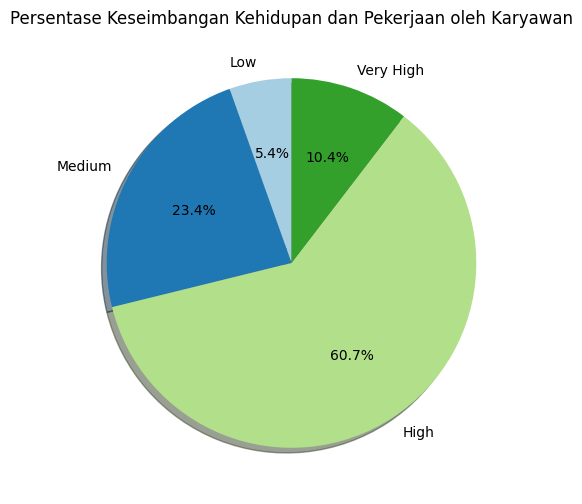

In [24]:
# Menghitung nilai di kolom 'WorkLifeBalance'
work_life_balance_counts = main_df['WorkLifeBalance'].value_counts().sort_index()

# Label khusus untuk pie chart sesuai dengan nilai numerik
labels = ['Low', 'Medium', 'High', 'Very High']

# Membuat pie chart
plt.figure(figsize=(15, 6))
plt.pie(work_life_balance_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Persentase Keseimbangan Kehidupan dan Pekerjaan oleh Karyawan')

# Menampilkan plot
plt.show()

Terdapat kurang dari 10% karyawan yang merasakan kurangnya keseimbangan kehidupan dan pekerjaan, dan sisanya memberikan penilaian yang baik terkait hal tersebut. Hasil ini cukup baik, namun dapat terus diperbaiki.

### Analisa Hubungan Pendapatan Bulanan terhadap Tingkat Attrition

In [25]:
# Memilih dan Mengatur Data Karyawan yang Mengalami Attrition
attrition_income = main_df[main_df['Attrition'] == 1]['MonthlyIncome']
attrition_income = attrition_income.reset_index()
attrition_income.drop(['index'], axis=1, inplace=True)

# Memilih dan Mengatur Data Karyawan yang Tidak Mengalami Attrition
no_attrition_income = main_df[main_df['Attrition'] == 0]['MonthlyIncome']
no_attrition_income = no_attrition_income.reset_index()
no_attrition_income.drop(['index'], axis=1, inplace=True)

# Menggabungkan Data dari Kedua Kelompok dan Memberi Nama Kolom
attrition_income['no_attrition'] = no_attrition_income
attrition_income.rename(columns={'MonthlyIncome': 'Attrition', 'no_attrition': 'NoAttrition'}, inplace=True)

# Melihat Hasil
print(attrition_income.head())


   Attrition  NoAttrition
0       4777         2991
1       2461        13525
2      19859         2001
3       2973         2804
4       2293         7457


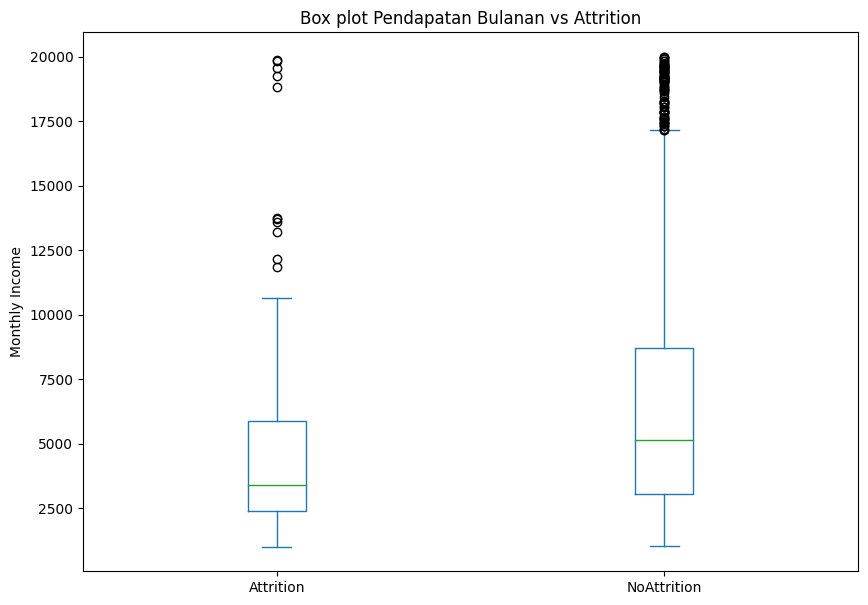

In [26]:
# Memilih dan Mengatur Data Karyawan yang Mengalami Attrition
attrition_income = main_df[main_df['Attrition'] == 1]['MonthlyIncome']
attrition_income = attrition_income.reset_index(drop=True)

# Memilih dan Mengatur Data Karyawan yang Tidak Mengalami Attrition
no_attrition_income = main_df[main_df['Attrition'] == 0]['MonthlyIncome']
no_attrition_income = no_attrition_income.reset_index(drop=True)

# Menggabungkan Data dari Kedua Kelompok dan Memberi Nama Kolom
combined_income = pd.DataFrame({'Attrition': attrition_income, 'NoAttrition': no_attrition_income})

# Membuat box plot
combined_income.plot(kind='box', figsize=(10, 7))

# Menambahkan judul dan label sumbu
plt.title('Box plot Pendapatan Bulanan vs Attrition')
plt.ylabel('Monthly Income')

# Menampilkan plot
plt.show()


Berdasarkan box plot di atas, karyawan yang memilih untuk meninggalkan perusahaan memiliki pendapatan bulanan yang lebih rendah dibandingkan karyawan yang memilih tetap di perusahaan.

### Analisa Attrition Rate berdasarkan Departemen

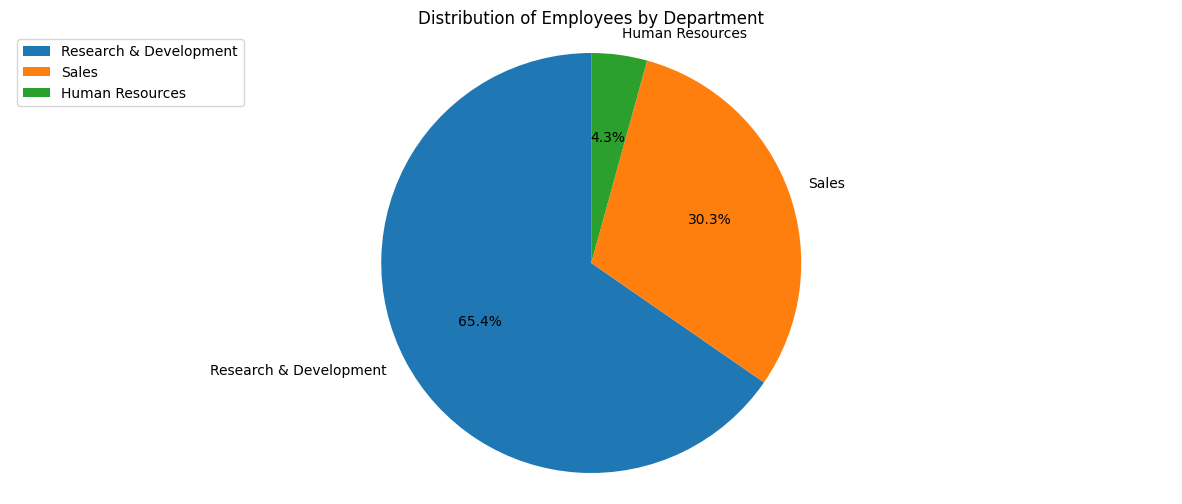

In [27]:
# Menghitung jumlah karyawan yang mengalami dan tidak mengalami attrition di setiap departemen
department_attrition = main_df.groupby(['Department', 'Attrition']).size().unstack()

# Menghitung jumlah karyawan di setiap departemen
department_counts = main_df['Department'].value_counts()

# Membuat pie chart
plt.figure(figsize=(15, 6))
plt.pie(department_counts,
        labels=department_counts.index,
        autopct='%1.1f%%',
        startangle=90)

# Menambahkan judul
plt.title('Distribution of Employees by Department')

# Menampilkan legend
plt.legend(loc='upper left')

# Menampilkan plot
plt.axis('equal')
plt.show()


Berdasarkan analisa, departemen Research & Development memiliki persentase terbesar untuk tingkat karyawan yang berhenti, yakni sebesar lebih dari 65%, disusul departemen Sales sebesar 30%. Oleh karenanya perlu diperhatikan sistem kerja pada departemen tersebut.